In [ ]:
import mask
import imp
imp.reload(mask)
n = [1.0,2.0,-3.0,2.0,2.0,-3.4,2.0,-2.0,1.0]
my_mask = mask.Mask(n)

print(my_mask.mask)
print(my_mask.mask_info)

my_mask.calculate_new_mask_turning_points([0.,1.0,0.0],(0.5,0.5),())

In [ ]:
# testbed for the standalone mask module
import mask
import imp
imp.reload(mask)

n = [1.0,2.0,-3.0,2.0,2.0,-3.4,2.0,-2.0,1.0]
my_mask = mask.Mask(n)
imp.reload(mask)
my_mask.calculate_new_mask_turning_points([0.,1.0,0.0,3.0,0.0],[0.5,0.5],[2])
print(my_mask.mask)

In [ ]:
# testbed for the standalone physics module
import mask
import imp
imp.reload(mask)
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import imp
import potential_profile
imp.reload(potential_profile)
import physics
imp.reload(physics)
import thomas_fermi
imp.reload(thomas_fermi)


model_physics = (E_scale,dx_scale,kT,x,V,K_onsite,sigma,mu_l,100)
plt.plot(x,V)

import markov
imp.reload(markov)
graph_model = (1,1)
graph = markov.Markov(graph_model,model_physics)

graph.generate_graph()
print(graph.get_current())
print(graph.get_max_prob_node())

import networkx as nx
plt.figure(2)
nx.draw_networkx(graph.G)


[ 2.17166359]
[2]


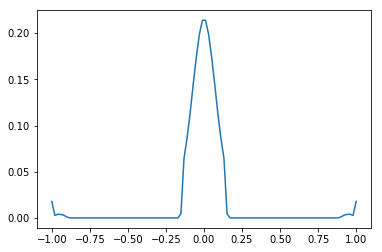

In [34]:
# testbed for the ThomasFermi module
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import thomas_fermi
import imp
imp.reload(thomas_fermi)
import potential_profile

E_scale = 'eV'
dx_scale = '1e-9'

kT = 400e-6
b1 = (-200e-3,-0.3,0.1,1)
d = (400e-3,0.0,0.1,1)
b2 = (-200e-3,0.3,0.1,1)

x = np.linspace(-1,1,100)
V = potential_profile.V_x_wire(x,[b1,d,b2])

K_onsite = 10e-3
sigma = x[1] - x[0]
model_physics = (E_scale,dx_scale,kT,x,V,K_onsite,sigma,mu_l,100)

mu_l = (50.0e-3,50.1e-3)

my_tf = thomas_fermi.ThomasFermi(model_physics)
num_dot,prelim_mask = my_tf.find_n_dot_estimate()

mu_d = [my_tf.mu_l[0]]*num_dot
n,N_d = my_tf.tf_iterative_solver_fixed_mu(prelim_mask,mu_d)
print(N_d)
N_est = [int(x) for x in N_d]
print(N_est)

n = my_tf.tf_iterative_solver_fixed_N(prelim_mask,N_est)

plt.plot(my_tf.x,n)

ValueError: x and y must have same first dimension, but have shapes (1,) and (5,)

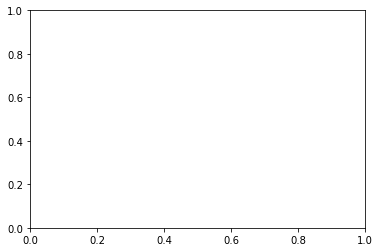

In [14]:
# testbed for potential_profile

import matplotlib.pyplot as plt
%matplotlib inline



plt.plot(x,V)

In [15]:
%pdb

Automatic pdb calling has been turned ON


In [4]:
# 1 point dot

import markov
imp.reload(markov)

V_d_vec = np.linspace(300e-3,400e-3,100)
current = np.zeros(len(V_d_vec))
charge_state = np.zeros(len(V_d_vec))

E_scale = 'eV'
dx_scale = '1e-9'

kT = 400e-6
x = np.linspace(-1,1,100)
K_onsite = 10e-3
sigma = x[1] - x[0]

mu_l = (50.0e-3,50.1e-3)

for i in range(len(V_d_vec)):
    b1 = (-200e-3,-0.3,0.1,1)
    d = (V_d_vec[i],0.0,0.1,1)
    b2 = (-200e-3,0.3,0.1,1)
    V = potential_profile.V_x_wire(x,[b1,d,b2])
    model_physics = (E_scale,dx_scale,kT,x,V,K_onsite,sigma,mu_l,100)
    
    graph_model = (2,1)
    graph = markov.Markov(graph_model,model_physics)

    graph.generate_graph()
    current[i] = graph.get_current()
    charge_state[i] = graph.get_max_prob_node()[1]

plt.figure(1)
plt.plot(V_d_vec,current)
plt.figure(2)
plt.plot(V_d_vec,charge_state)

ModuleNotFoundError: No module named 'networkx'

In [2]:
# 2 dots (point dots)
import numpy as np
import matplotlib.pyplot as plt
import imp
%matplotlib inline

import markov
imp.reload(markov)

V_d_vec = np.linspace(-35e-3,0,50)
current = np.zeros((len(V_d_vec),len(V_d_vec)))
charge_state = np.zeros((2,len(V_d_vec),len(V_d_vec)))

E_scale = 'eV'
dx_scale = '1e-9'

kT = 400e-6
#x = np.linspace(-1,1,100)
x = np.array([1,2,3,4,5,6,7])
#V = potential_profile.V_x_wire(x,[b1,d,b2])
V = np.array([0.0,100e-3,0.0,100e-3,0.0,100e-3,0.0])
K_onsite = 10e-3
sigma = x[1] - x[0]

mu_l = (50e-3,50.1e-3)

for i in range(len(V_d_vec)):
    print(i)
    for j in range(len(V_d_vec)):
    #b1 = (-200e-3,-0.3,0.1,1)
    #d = (V_d_vec[i],0.0,0.1,1)
    #b2 = (-200e-3,0.3,0.1,1)
    #V = potential_profile.V_x_wire(x,[b1,d,b2])
        V[2] = V_d_vec[i]
        V[4] = V_d_vec[j]
        model_physics = (E_scale,dx_scale,kT,x,V,K_onsite,sigma,mu_l,100)
    
        graph_model = (2,1)
        graph = markov.Markov(graph_model,model_physics)

        graph.generate_graph()
        current[i,j] = graph.get_current()
        charge_state[0,i,j] = graph.get_max_prob_node()[1]
        charge_state[1,i,j] = graph.get_max_prob_node()[2]


ModuleNotFoundError: No module named 'matplotlib'

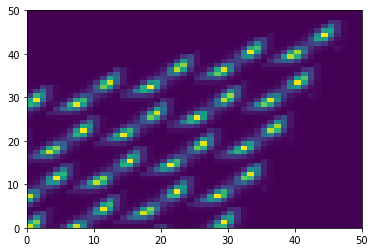

In [35]:
plt.pcolor(current)

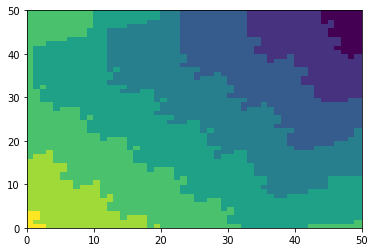

In [51]:
plt.pcolor(charge_state[1]+charge_state[0])


In [53]:
dot0_charge_data = charge_state[0].flatten()
dot1_charge_data = charge_state[1].flatten()
current_data = current.flatten()
dat_size = len(current_data)
n_inp = 3
n_out = 2
n = n_inp + n_out
data = np.zeros((dat_size,n))
for i in range(len(V_d_vec)):
    for j in range(len(V_d_vec)):
        data[j + i*len(V_d_vec),0] = V_d_vec[i]
        data[j + i*len(V_d_vec),1] = V_d_vec[j]
        data[j + i*len(V_d_vec),2] = current[i,j]
        data[j + i*len(V_d_vec),3] = charge_state[0,i,j]
        data[j + i*len(V_d_vec),4] = charge_state[1,i,j]
        
np.savetxt('/Users/sandesh/quantum-ml/ndot/ml/two_data.txt',data)

2500

In [45]:
dot2_charge_data[0]


3.0